In [1]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import splat
import numpy
import astropy.units as u
from astropy import constants as const 
import copy
from scipy.integrate import trapz        # for numerical integration
from scipy.interpolate import interp1d
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database


In [2]:
import matplotlib as mpl
#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.bottom']=True
mpl.rcParams['xtick.top']=True
mpl.rcParams['xtick.major.width']=0.9
mpl.rcParams['xtick.minor.width']=0.9
mpl.rcParams['ytick.major.width']=0.9
mpl.rcParams['ytick.minor.width']=0.9
mpl.rcParams['ytick.right']=True
mpl.rcParams['ytick.left']=True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

mpl.rcParams['font.serif'] = 'Ubuntu'
#mpl.rcParams['font.monospace'] = 'Ubuntu Mono'
mpl.rcParams["mathtext.fontset"] = "dejavuserif"

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['figure.titlesize'] = 18

%matplotlib inline


In [3]:
import os

In [4]:
DATA_FOLDER='/users/caganze/research/J1624/data/'
FIG_FOLDER='/users/caganze/research/J1624/figures/'

In [5]:
fl='/users/caganze/research/J1624/data/nires_J1624-3212_20200720.fits'

In [6]:
data=fits.open(fl)[0].data

In [7]:
spectra=[]

In [8]:
for idx in np.arange(4):
    spectra.append(splat.Spectrum(wave=data[idx][0], \
                                  flux=data[idx][1],
                                  noise=data[idx][2],
                                  instrument='NIRES'))

In [9]:
s1=splat.stitch(spectra[0], spectra[1])
s2=splat.stitch(spectra[2], spectra[3])

In [10]:
#s1.flux

In [11]:
s=splat.stitch(s1, s2)

In [12]:
sxd= splat.Spectrum(DATA_FOLDER+'/spex-sxd-merged_J1624-3212_210407.fits', instrument='SXD')

In [13]:
#

In [14]:
#using Adam's metallicity measurements
import splat.empirical as spem
#for r in ['rojas','terrien','mann13','mann14','newton']:
#    spem.metallicity(s,ref=r,verbose=True, plot=True)


In [15]:
s.reset()

In [16]:
spem.metallicity(s,ref='mann14',verbose=True, plot=True, 
                 filename='/users/caganze/research/J1624/figures/metallicity.pdf')


Computing [Fe/H] from Mann et al. (2014) (2014AJ....147..160M), valid for M4.5--M9.5, -0.58 < [Fe/H] < +0.56
K-band [Fe/H] = 0.29+/-0.07


{'reference': 'Mann et al. (2014)',
 'bibcode': '2014AJ....147..160M',
 'measures': {'feh': [0.290922749741257, 0.07022471373270024]}}

In [17]:
spem.metallicity(sxd,ref='mann14',verbose=True, plot=True, 
                 filename='/users/caganze/research/J1624/figures/metallicity.pdf')


Computing [Fe/H] from Mann et al. (2014) (2014AJ....147..160M), valid for M4.5--M9.5, -0.58 < [Fe/H] < +0.56
K-band [Fe/H] = 0.25+/-0.08


{'reference': 'Mann et al. (2014)',
 'bibcode': '2014AJ....147..160M',
 'measures': {'feh': [0.25334561575352565, 0.08052189581012278]}}

In [18]:
0.25-0.08

0.16999999999999998

In [19]:
_, scl0=splat.compareSpectra( sxd, s, fit_ranges=[2.0, 2.2],  statistic='chisqr', novar2=False)

In [20]:
scl0

0.6816644867672124

In [21]:
sxd.flux

<Quantity [1.88582806e-14, 1.58582474e-14, 1.05539628e-14, ...,
           2.66886190e-14, 1.39455869e-14, 5.47380685e-15] erg / (cm2 micron s)>

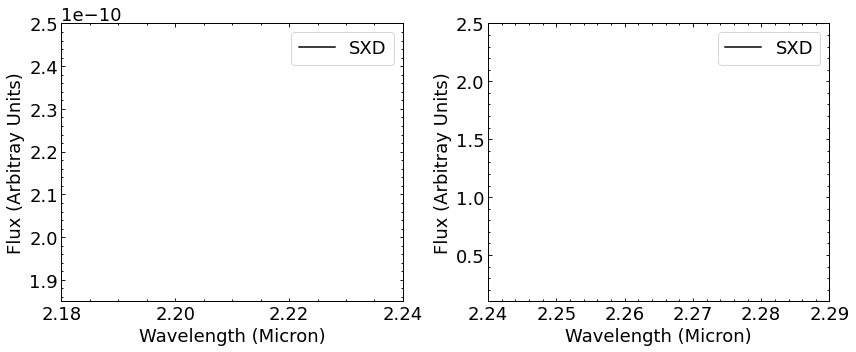

In [22]:
fig,(ax, ax1)=plt.subplots(figsize=(12, 5), ncols=2)
ax.plot(sxd.wave.value, sxd.flux.value, label='SXD', color='k')
#ax.plot(s.wave, s.flux, label='NIRES')
ax.fill_between(sxd.wave.value, sxd.flux.value-sxd.noise.value, sxd.flux.value+sxd.noise.value,\
                color='grey', alpha=0.5)
ax.set(xlim=[2.18, 2.24], ylim=[1.85e-10,2.50e-10], xlabel='Wavelength (Micron)',
       ylabel='Flux (Arbitray Units)')

ax1.plot(sxd.wave.value, sxd.flux.value, label='SXD', color='k')
ax1.fill_between(sxd.wave.value, sxd.flux.value-sxd.noise.value, sxd.flux.value+sxd.noise.value, \
                 color='grey', alpha=0.5)
#ax1.plot(s.wave, s.flux, label='NIRES')
ax1.set(xlim=[2.24, 2.29], ylim=np.array([0.1, 2.5]),
        xlabel='Wavelength (Micron)',
       ylabel='Flux (Arbitray Units)')
#ax.axvline( 2.2079)
#ax.axvline(2.2113)
ax1.minorticks_on()
ax.minorticks_on()
ax1.legend()
ax.legend()
plt.tight_layout()
plt.savefig(FIG_FOLDER+'/metallicity_lines.pdf')

In [23]:
#splat.measureEWSet(sxd,ref='mann2014', plot=True)

In [24]:
#!open  ~/research/splat/splat/empirical.py

In [25]:
import kastredux
FUNITS=u.erg/u.micron/u.s/(u.cm**2)
WUNITS=u.micron
f='/users/caganze/research/J1624/data/kastBLUE_J1624-3212_20200722.fits'
#fr='/users/caganze/research/J1624/data/kastRED_J1624-3212_20200722.fits'
sblue=kastredux.readSpectrum(f, flux_unit=FUNITS)
fr='/users/caganze/research/J1624/data/kastRED_J1624-3212_20210404.txt'
sred=kastredux.readSpectrum(fr)


In [26]:
#sblue.convertFlux(FUNITS)
sblue.convertWave(WUNITS)
#sred.convertFlux(FUNITS)
sred.convertWave(WUNITS)


('M5.0', 0.5)

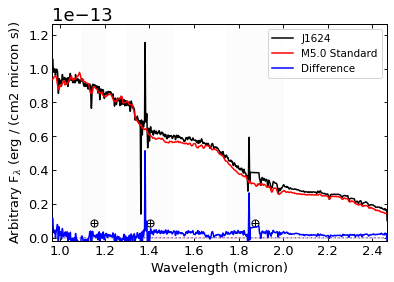

In [27]:
s.smooth(30)
s.name='J1624'
splat.classifyByStandard(s,plot=True,method='kirkpatrick',telluric=True, save=True,
                         filename='/users/caganze/research/J1624/figures/J1624_nirclassif.pdf')


In [28]:
#sblue0=splat.Spectrum(wave=sblue.wave, flux=sblue.flux, noise=sblue.variance**0.5)
sred0=splat.Spectrum(wave=sred.wave, flux=sred.flux, noise=sred.variance**0.5)


In [29]:
fold='/users/caganze/research/J1624/data/palomar_dbsp/'


In [30]:
f0=fold+'w1624m3212_b.dat'
f1=fold+'w1624m3212_r.dat'


In [31]:
from astropy.io import ascii
df0=ascii.read(f0).to_pandas()
df1=ascii.read(f1).to_pandas()


In [32]:
#create a mask array
#arr0=

In [33]:
spal_blue=splat.Spectrum(wave=df0.col1.values/10000, flux=df0.col2.values, wunit=u.micron)
spal_red=splat.Spectrum(wave=df1.col1.values/10000, flux=df1.col2.values, wunit=u.micron)
sr=splat.Spectrum(wave=sred.wave, flux=sred.flux, noise=sred.variance**0.5)
sb=splat.Spectrum(wave=sblue.wave, flux=sblue.flux, noise=sblue.variance**0.5)


In [34]:
from astropy.table import Table

In [35]:
#m5

In [36]:
m5= fits.open(DATA_FOLDER+'/M5_+0.0_Dwarf.fits')
m5_std_tbl=Table(m5[1].data).to_pandas()
m5_spec= splat.Spectrum(wave=10**m5_std_tbl.LogLam.values/1e4, flux=m5_std_tbl.Flux.values, 
                        noise=m5_std_tbl.PropErr.values, unit=u.micron)

In [37]:
#spal_blue.fluxCalibrate('GAIA_G', 12.6265, apparent=True, notch=[0.])
#spal_red.fluxCalibrate('Gaia_G', 12.6265)   
#sr.fluxCalibrate('Gaia_R',11.0375, notch=[0.58, 0.93 ])
#s.fluxCalibrate('MKO H', 8.470 )
sxd.fluxCalibrate('MKO H', 8.470 )


In [38]:
splat.filterMag(spal_red, 'PANSTARRS_G')


(56.53682358233583, 2.1316282072803006e-14)

In [39]:
#m5_std_tbl=Table(hdu[1].data).to_pandas()

In [40]:
#spal_red.scale(scl)

In [41]:
m5_std_spex= splat.STDS_DWARF_SPEX['M5.0']

In [42]:
m5_std_spex

SPEX-PRISM spectrum of Wolf 47 (M5.0)

In [43]:
#sr.wave.max()

In [44]:
#_, scl=splat.compareSpectra( sxd, spal_red, fit_ranges=[0.7, .89],  statistic='chisqr', novar2=False)
#_, scl2=splat.compareSpectra(spal_red, sb, fit_ranges=[0.45, 0.55],  statistic='chisqr', novar2=False)
_, scl3=splat.compareSpectra(m5_spec, sxd, fit_ranges=[0.7, 1.0],  statistic='chisqr', novar2=False)
sxd.scale(scl3)
_, scl5=splat.compareSpectra(m5_spec, sr, fit_ranges=[0.6, 0.89],  statistic='chisqr', novar2=False)
sr.scale(scl5)
_, scl4=splat.compareSpectra(m5_spec,  sb, fit_ranges=[0.4, 0.54],  statistic='chisqr')
sb.scale(scl4)
_, scl6= splat.compareSpectra(sxd, m5_std_spex, fit_ranges=[ 0.9, 1.4 ] , statistic='chisqr', novar2=False)
m5_std_spex.scale(scl6)

In [45]:
#sb.wave.max(), spal_blue.wave.max()

In [46]:
#sr.wave.max(), sr.wave.min()

In [47]:
#scl5

In [48]:
#ghj

In [49]:
#m5_spec.scale(scl5)

In [50]:
#scl4

In [51]:
#sb.scale(scl4)

In [52]:
#spal_red.wave.max(), m5_spec.wave.max(), spal_red.wave.min(), m5_spec.wave.min()

In [53]:
#sb.flux

In [54]:
#sb.scale(scl4)

[None, None]

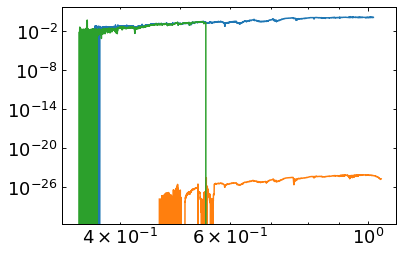

In [55]:
fig, ax=plt.subplots()
ax.plot(m5_spec.wave, m5_spec.flux )
ax.plot(spal_red.wave, spal_red.flux )
ax.plot(sb.wave, sb.flux )
ax.set(yscale='log', xscale='log')

In [56]:
mask0=np.logical_and(sb.wave.value < 0.53,sb.wave.value>0.4)
mask1=np.logical_and(sr.wave.value < 0.9,sr.wave.value>0.65)
mask2=~np.logical_or.reduce([[(sxd.wave.value >1.350) & (sxd.wave.value<1.42)],
                        [(sxd.wave.value>1.87) & (sxd.wave.value<1.9)],
                        [sxd.wave.value > 2.45]]).flatten()

In [57]:
m5_spec.smooth(30)
sb.smooth(30)
sr.smooth(30)
sxd.smooth(30)

In [66]:
m5_std_mask=m5_spec.wave.value>.9

In [59]:
ax.errorbar

<bound method Axes.errorbar of <AxesSubplot:>>

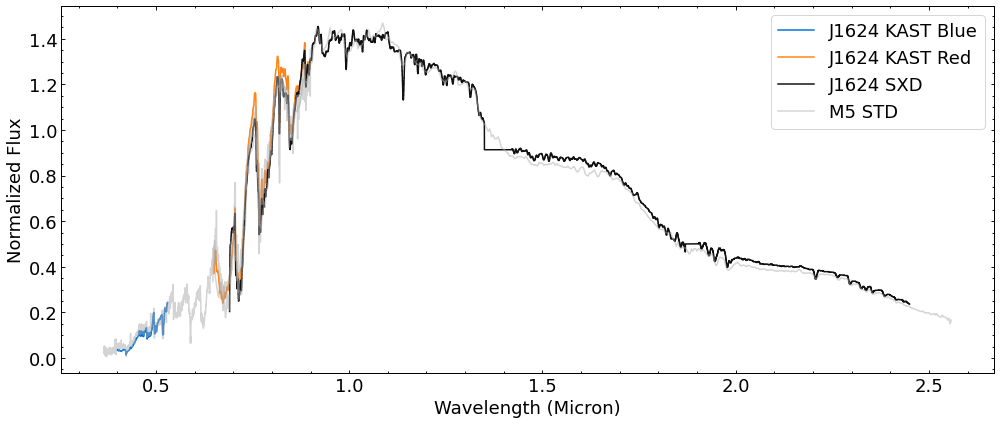

In [67]:
fig, ax=plt.subplots(figsize=(14, 6))
ax.step(sb.wave[mask0], sb.flux[mask0], label='J1624 KAST Blue',  c='#0074D9')
ax.step(sr.wave[mask1], sr.flux[mask1], label='J1624 KAST Red', c='#FF851B')
ax.step(sxd.wave[mask2], sxd.flux[mask2], label='J1624 SXD', c='#111111')

plt.plot(m5_spec.wave[~m5_std_mask], m5_spec.flux[~m5_std_mask], label='M5 STD', \
         linestyle='-', alpha=0.5, c='#AAAAAA')
plt.plot(m5_std_spex.wave,m5_std_spex.flux, linestyle='-', alpha=0.5, c='#AAAAAA')
#plt.step(spal_red.wave, spal_red.flux, label='Palomar Red', c='#FF851B')
#plt.step(spal_blue.wave, spal_blue.flux, label='Palomar Blue', c='#0074D9')

ax.set( xlabel='Wavelength (Micron)',\
      ylabel='Normalized Flux')
ax.minorticks_on()
plt.tight_layout()
plt.legend()
plt.savefig('/users/caganze/research/J1624/figures/stiched_spectra.pdf', bbox_inches='tight')

In [61]:
np.save(DATA_FOLDER+'/scaled_blue.npy', [sb.wave.value[mask0], sb.flux.value[mask0], sb.noise.value[mask0]])
np.save(DATA_FOLDER+'/scaled_red.npy', [sr.wave.value[mask1], sr.flux.value[mask1], sr.noise.value[mask1]])
np.save(DATA_FOLDER+'/scaled_infrared.npy', [sxd.wave.value[mask2], sxd.flux.value[mask2], sxd.noise.value[mask2]])


In [65]:
#import popsims


In [63]:
#def create_spe

In [64]:
ghj

NameError: name 'ghj' is not defined

In [ ]:
m5_spec

In [ ]:
j

In [ ]:
hdu=fits.open(h)

In [ ]:
flux=hdu[0].data
wave=hdu[0].header['CRVAL1']+hdu[0].header['CDELT1']*np.arange(0, hdu[0].header['NAXIS1'])

In [ ]:
len(wave)==len(flux)

In [ ]:
fig, ax=plt.subplots()
plt.plot(wave, flux)

In [ ]:
hdu[0].header

In [ ]:
sb.save(DATA_FOLDER+'/kast_blue_scaled.fits')

In [ ]:


#total_wave=sxd.wave.value
#toal_flux=sxd.flux
#total_noise=sxd.noise.value


In [ ]:
len(sxd.wave), len(sxd.flux), len(total_wave), len(sxd.flux.value)

In [ ]:
mask= np.logical_or.reduce([[(total_wave > 0.54) & (total_wave <0.57)],
                          [(total_wave >1.350) & (total_wave<1.425)],
                        [(total_wave >1.80) & (total_wave<1.92)],
                        [total_wave > 2.45]])

In [ ]:

#createa a complete spectrun


In [ ]:
df=pd.DataFrame()
df['wave (micron)']=total_wave
df['flux (funits)']=total_flux
df['mask']=mask.flatten()
df['noise']=total_noise
df.to_csv('/users/caganze/research/J1624/data/j1624_kast_nires.csv')

In [ ]:
plt.plot(df['wave (micron)'][~mask.flatten()], df['flux (funits)'][~mask.flatten()])
#plt.xlim([0.7, 0.9])
plt.yscale('log')
#plt.xscale('log')

#\